In [33]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [34]:
type(data)

dict

In [37]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [39]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12238,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.988886e+07,1.988886e+07,False,NaN,1,NaN,NaN,None,2025-07-07T11:06:00.000Z,108732.613516,4.046230e+10,34.9075,-0.075125,0.661990,0.951786,3.330951,9.078209,37.650565,2.162567e+12,64.4170,2.283385e+12,None,2025-07-07T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 16:37:23.331542
1,1027,Ethereum,ETH,ethereum,10370,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207169e+08,1.207169e+08,True,NaN,2,NaN,NaN,None,2025-07-07T11:06:00.000Z,2561.347633,1.578410e+10,77.6040,-0.244688,2.072688,4.191497,2.642547,31.061493,63.591089,3.091979e+11,9.2102,3.091979e+11,None,2025-07-07T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 16:37:23.331542
2,825,Tether USDt,USDT,tether,135420,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.585817e+11,1.608224e+11,True,NaN,3,NaN,NaN,None,2025-07-07T11:05:00.000Z,1.000051,5.730400e+10,57.8642,-0.008988,-0.023216,-0.001520,-0.053166,-0.017215,0.025631,1.585897e+11,4.7240,1.608306e+11,None,2025-07-07T11:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-07 16:37:23.331542
3,52,XRP,XRP,xrp,1640,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.906819e+10,9.998597e+10,False,NaN,4,NaN,NaN,None,2025-07-07T11:05:00.000Z,2.289314,2.533282e+09,52.9444,0.399646,0.631556,5.140218,4.622829,3.465486,20.939861,1.352257e+11,4.0280,2.289314e+11,None,2025-07-07T11:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 16:37:23.331542
4,1839,BNB,BNB,bnb,2603,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408851e+08,1.408851e+08,False,NaN,5,NaN,NaN,None,2025-07-07T11:06:00.000Z,661.948796,1.512039e+09,28.3636,-0.070200,1.080460,1.320971,2.079942,7.517068,18.819384,9.325874e+10,2.7779,9.325874e+10,None,2025-07-07T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 16:37:23.331542
5,5426,Solana,SOL,solana,944,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.355763e+08,6.047418e+08,True,NaN,6,5.252369e+08,8.002704e+10,None,2025-07-07T11:05:00.000Z,152.363697,3.360199e+09,121.8024,0.205004,3.434718,1.407936,0.253442,-1.543679,39.941770,8.160239e+10,2.4307,9.214070e+10,None,2025-07-07T11:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 16:37:23.331542
6,3408,USDC,USDC,usd-coin,29106,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.208165e+10,6.208165e+10,False,NaN,7,6.090122e+10,6.089358e+10,None,2025-07-07T11:05:00.000Z,0.999875,6.762492e+09,104.9191,-0.009516,-0.008130,0.003874,-0.008238,-0.017796,-0.027005,6.207387e+10,1.8490,6.207387e+10,None,2025-07-07T11:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-07 16:37:23.331542
7,1958,TRON,TRX,tron,1194,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.478080e+10,9.478088e+10,True,NaN,8,7.165966e+10,2.061903e+10,None,2025-07-07T11:06:00.000Z,0.287736,3.172135e+08,22.5277,0.297822,0.990480,3.916042,2.985639,14.582530,22.144163,2.727181e+10,0.8122,2.727183e+10,None,2025-07-07T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 16:37:23.331542
8,74,Dogecoin,DOGE,dogecoin,1247,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, med

In [41]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\drsai\OneDrive\Documents\Python automating crypto website\API.csv'):
        df.to_csv(r'C:\Users\drsai\OneDrive\Documents\Python automating crypto website\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\drsai\OneDrive\Documents\Python automating crypto website\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\drsai\OneDrive\Documents\Python automating crypto website\API.csv')

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


In [43]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [45]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12238,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19888856.00000,19888856.00000,False,NaN,1,NaN,NaN,None,2025-07-07T11:06:00.000Z,108732.61352,40462301234.99715,34.90750,-0.07513,0.66199,0.95179,3.33095,9.07821,37.65057,2162567292732.18213,64.41700,2283384883845.29980,None,2025-07-07T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 16:37:23.331542
1,1027,Ethereum,ETH,ethereum,10370,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120716893.59855,120716893.59855,True,NaN,2,NaN,NaN,None,2025-07-07T11:06:00.000Z,2561.34763,15784100374.44968,77.60400,-0.24469,2.07269,4.19150,2.64255,31.06149,63.59109,309197929733.36139,9.21020,309197929733.35999,None,2025-07-07T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 16:37:23.331542
2,825,Tether USDt,USDT,tether,135420,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,158581664726.51511,160822422835.83536,True,NaN,3,NaN,NaN,None,2025-07-07T11:05:00.000Z,1.00005,57304004276.92181,57.86420,-0.00899,-0.02322,-0.00152,-0.05317,-0.01722,0.02563,158589743966.27908,4.72400,160830616235.22000,None,2025-07-07T11:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-07 16:37:23.331542
3,52,XRP,XRP,xrp,1640,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59068187926.00000,99985968138.00000,False,NaN,4,NaN,NaN,None,2025-07-07T11:05:00.000Z,2.28931,2533281809.09124,52.94440,0.39965,0.63156,5.14022,4.62283,3.46549,20.93986,135225654442.51297,4.02800,228931442102.00000,None,2025-07-07T11:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 16:37:23.331542
4,1839,BNB,BNB,bnb,2603,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140885129.40000,140885129.40000,False,NaN,5,NaN,NaN,None,2025-07-07T11:06:00.000Z,661.94880,1512038671.26597,28.36360,-0.07020,1.08046,1.32097,2.07994,7.51707,18.81938,93258741763.70526,2.77790,93258741763.71001,None,2025-07-07T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 16:37:23.331542
5,5426,Solana,SOL,solana,944,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,535576343.95646,604741797.57895,True,NaN,6,525236893.30000,80027035093.08183,None,2025-07-07T11:05:00.000Z,152.36370,3360199350.20520,121.80240,0.20500,3.43472,1.40794,0.25344,-1.54368,39.94177,81602392024.55939,2.43070,92140696273.33000,None,2025-07-07T11:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 16:37:23.331542
6,3408,USDC,USDC,usd-coin,29106,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,62081653828.71687,62081653828.71687,False,NaN,7,60901219650.23000,60893581722.14526,None,2025-07-07T11:05:00.000Z,0.99987,6762492228.79251,104.91910,-0.00952,-0.00813,0.00387,-0.00824,-0.01780,-0.02701,62073867856.44819,1.84900,62073867856.45000,None,2025-07-07T11:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-07 16:37:23.331542
7,1958,TRON,TRX,tron,1194,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94780799765.67545,94780884136.44524,True,NaN,8,71659659264.00000,20619032476.78192,None,2025-07-07T11:06:00.000Z,0.28774,317213547.91283,22.52770,0.29782,0.99048,3.91604,2.98564,14.58253,22.14416,27271806880.131

In [47]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.07513,0.66199,0.95179,3.33095,9.07821,37.65057
Ethereum,-0.24469,2.07269,4.19150,2.64255,31.06149,63.59109
Tether USDt,-0.00899,-0.02322,-0.00152,-0.05317,-0.01722,0.02563
XRP,0.39965,0.63156,5.14022,4.62283,3.46549,20.93986
BNB,-0.07020,1.08046,1.32097,2.07994,7.51707,18.81938
Solana,0.20500,3.43472,1.40794,0.25344,-1.54368,39.94177
USDC,-0.00952,-0.00813,0.00387,-0.00824,-0.01780,-0.02701
TRON,0.29782,0.99048,3.91604,2.98564,14.58253,22.14416
Dogecoin,0.17905,4.17499,4.01852,-8.12906,-7.14536,13.43383


In [49]:
df4 = df3.stack()
df4.head(10)

name                                  
Bitcoin   quote.USD.percent_change_1h    -0.07513
          quote.USD.percent_change_24h    0.66199
          quote.USD.percent_change_7d     0.95179
          quote.USD.percent_change_30d    3.33095
          quote.USD.percent_change_60d    9.07821
          quote.USD.percent_change_90d   37.65057
Ethereum  quote.USD.percent_change_1h    -0.24469
          quote.USD.percent_change_24h    2.07269
          quote.USD.percent_change_7d     4.19150
          quote.USD.percent_change_30d    2.64255
dtype: float64

In [51]:
type(df4)

pandas.core.series.Series

In [53]:
df5 = df4.to_frame(name='values')
df5.head(10)

values
name                                          
Bitcoin  quote.USD.percent_change_1h  -0.07513
         quote.USD.percent_change_24h  0.66199
         quote.USD.percent_change_7d   0.95179
         quote.USD.percent_change_30d  3.33095
         quote.USD.percent_change_60d  9.07821
         quote.USD.percent_change_90d 37.65057
Ethereum quote.USD.percent_change_1h  -0.24469
         quote.USD.percent_change_24h  2.07269
         quote.USD.percent_change_7d   4.19150
         quote.USD.percent_change_30d  2.64255

In [55]:
df5.count()

values    90
dtype: int64

In [57]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6.head(10)

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.07513
1,Bitcoin,quote.USD.percent_change_24h,0.66199
2,Bitcoin,quote.USD.percent_change_7d,0.95179
3,Bitcoin,quote.USD.percent_change_30d,3.33095
4,Bitcoin,quote.USD.percent_change_60d,9.07821
5,Bitcoin,quote.USD.percent_change_90d,37.65057
6,Ethereum,quote.USD.percent_change_1h,-0.24469
7,Ethereum,quote.USD.percent_change_24h,2.07269
8,Ethereum,quote.USD.percent_change_7d,4.19150
9,Ethereum,quote.USD.percent_change_30d,2.64255


In [59]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7.head(10)

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.07513
1,Bitcoin,quote.USD.percent_change_24h,0.66199
2,Bitcoin,quote.USD.percent_change_7d,0.95179
3,Bitcoin,quote.USD.percent_change_30d,3.33095
4,Bitcoin,quote.USD.percent_change_60d,9.07821
5,Bitcoin,quote.USD.percent_change_90d,37.65057
6,Ethereum,quote.USD.percent_change_1h,-0.24469
7,Ethereum,quote.USD.percent_change_24h,2.07269
8,Ethereum,quote.USD.percent_change_7d,4.19150
9,Ethereum,quote.USD.percent_change_30d,2.64255


In [61]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7.head(10)

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.07513
1,Bitcoin,24h,0.66199
2,Bitcoin,7d,0.95179
3,Bitcoin,30d,3.33095
4,Bitcoin,60d,9.07821
5,Bitcoin,90d,37.65057
6,Ethereum,quote.USD.percent_change_1h,-0.24469
7,Ethereum,24h,2.07269
8,Ethereum,7d,4.19150
9,Ethereum,30d,2.64255


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

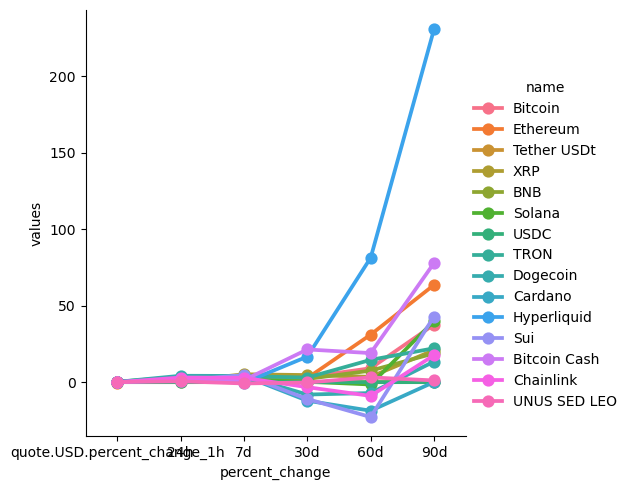

In [66]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [70]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,108732.61352,2025-07-07 16:37:23.331542


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

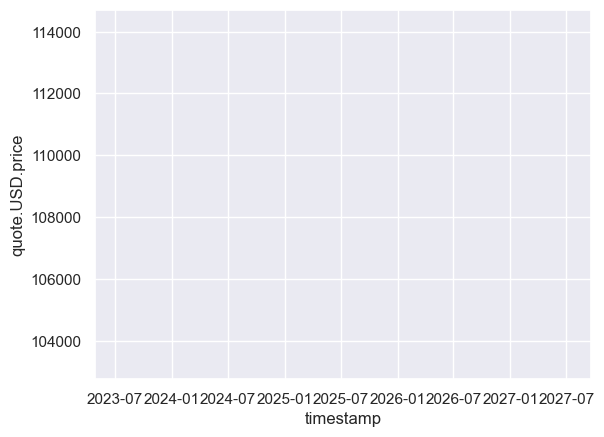

In [72]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)